In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import itertools

In [73]:
df1 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217898569-12_55.txt')
df2 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217899985-1_02.txt')
df3 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217903881-1_06.txt')
df4 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217906095-1_09.txt')
df5 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217913809-1_24.txt')
df6 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217883948-12_31.txt')
df7 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217908058-1_13.txt')
df8 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214527501_15-18.txt')
df9 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214537070_15-34.txt')
df10 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214540891_15-41.txt')
df11 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214551353_15-58.txt')
df12 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214560034_16-13.txt')
df13 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228184860-10_53.txt')
df14 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228194973-10_58.txt')
df15 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228197814-11_02.txt')
df16 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228200158-11_06.txt')
df17 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228202727-11_14.txt')
df18 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228207467-11_36.txt')
df19 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228271593-1_24.txt')
df20 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228285553-1_47.txt')


# dataframes for pothole annotated files

pdf1 = pd.read_csv('./potholes/sensorData_23-03-2018_15217898607-12_55.txt')
pdf2 = pd.read_csv('./potholes/sensorData_23-03-2018_15217899997-1_02.txt')
pdf3 = pd.read_csv('./potholes/sensorData_23-03-2018_15217903905-1_06.txt')
pdf4 = pd.read_csv('./potholes/sensorData_23-03-2018_15217906130-1_09.txt')
pdf5 = pd.read_csv('./potholes/sensorData_23-03-2018_15217914003-1_24.txt')
pdf6 = pd.read_csv('./potholes/sensorData_23-03-2018_15217883957-12_31.txt')
pdf7 = pd.read_csv('./potholes/sensorData_23-03-2018_15217908081-1_13.txt')
pdf8 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214527532_15-18.txt')
pdf9 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214537329_15-34.txt')
pdf10 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214540946_15-41.txt')
pdf11 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214551395_15-58.txt')
pdf12 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214560096_16-13.txt')
pdf13 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228184880-10_53.txt')
pdf14 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228194989-10_58.txt')
pdf15 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228197815-11_02.txt')
pdf16 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228200151-11_06.txt')
pdf17 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228202691-11_14.txt')
pdf18 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228207479-11_36.txt')
pdf19 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228271641-1_24.txt')
pdf20 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228285574-1_47.txt')

df1.head()

,timestamp,accx,accy,accz,gyrx,gyry,gyrz,longitude,latitude,speed
0,152178985702,0.152901,-0.657606,9.569601,-0.002742,0.008070,-0.005377,77.643354,12.87931,0.0
1,152178985720,-0.444470,-0.501953,9.585513,0.000966,-0.007851,-0.005371,77.643354,12.87931,0.0
2,152178985742,-0.195615,-0.610109,10.012871,0.000354,-0.009804,-0.004395,77.643354,12.87931,0.0
3,152178985764,-0.310112,-0.708696,9.713529,0.000969,-0.009312,-0.004761,77.643354,12.87931,0.0
4,152178985784,-0.400679,-0.345822,10.250119,-0.000861,-0.003700,-0.004639,77.643354,12.87931,0.0


In [74]:
df_main = pd.read_csv('./features.txt')
df_main

,ts_start,ts_end,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,...,min_gx,min_gy,min_gz,max_ax,max_ay,max_az,max_gx,max_gy,max_gz,label


In [75]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [76]:
# this is to calcualte features by aggregating 10 data pts
df_index =0

for j in range(0,19):
    
    if(df_index == 0):
        df = df1
        pdf = pdf1
    elif(df_index == 1):
        df = df2
        pdf = pdf2
    elif(df_index == 2):
        df = df3
        pdf = pdf3
    elif(df_index == 3):
        df = df4
        pdf = pdf4
    elif(df_index == 4):
        df = df5
        pdf = pdf5
    elif(df_index == 5):
        df = df6
        pdf = pdf6
    elif(df_index == 6):
        df = df7
        pdf = pdf7
    elif(df_index == 7):
        df = df8
        pdf = pdf8
    elif(df_index == 8):
        df = df9
        pdf = pdf9
    
    elif(df_index == 9):
        df = df11
        pdf = pdf11
    elif(df_index == 10):
        df = df12
        pdf = pdf12
    elif(df_index == 11):
        df = df13
        pdf = pdf13
    elif(df_index == 12):
        df = df14
        pdf = pdf14
    elif(df_index == 13):
        df = df15
        pdf = pdf15
    elif(df_index == 14):
        df = df16
        pdf = pdf16
    elif(df_index == 15):
        df = df17
        pdf = pdf17
    elif(df_index == 16):
        df = df18
        pdf = pdf18
    elif(df_index == 17):
        df = df19
        pdf = pdf19
    elif(df_index == 18):
        df = df20
        pdf = pdf20
    else:
        df = df10
        pdf = pdf10
    
    df_index += 1
    count = 0
    k = 0
    
    for i in range(1,len(df),10):    # step size is 10 means aggregrating 10 data pts means 1 second data
        if(i+9 >= len(df)):
            break
        #print(i)
        dt = df[i-1:i+10]      # chunking the given dataframe into smaller dataframe containing 10 pts
        start = dt.timestamp[i-1]
        end = dt.timestamp[i+9]
        a = dt.mean()      # will give an array of mean of columns of dt
        mean_ax = a[1]
        mean_ay = a[2]
        mean_az = a[3]
#         mean_gx = a[4]
#         mean_gy = a[5]
#         mean_gz = a[6]
        a = dt.min()
        min_ax = a[1]
        min_ay = a[2]
        min_az = a[3]
#         min_gx = a[4]
#         min_gy = a[5]
#         min_gz = a[6]
        a = dt.max()
        max_ax = a[1]
        max_ay = a[2]
        max_az = a[3]
#         max_gx = a[4]
#         max_gy = a[5]
#         max_gz = a[6]
        a = dt.std()
        sd_ax = a[1]
        sd_ay = a[2]
        sd_az = a[3]
#         sd_gx = a[4]
#         sd_gy = a[5]
#         sd_gz = a[6]
        a = dt.var()
        var_ax = a[1]
        var_ay = a[2]
        var_az = a[3]
        
        #adding max-min
        mm_x = max_ax - min_ax
        mm_y = max_ay - min_ay
        mm_z = max_az - min_az
        

        #taking gradients
        arx = dt['accx']
        ary = dt['accy']
        arz = dt['accz']
        tm = dt['timestamp']
        dx = np.gradient(arx, tm).max()
        dy = np.gradient(ary, tm).max()
        dz = np.gradient(arz, tm).max()
        
        #taking fourier transforms
        ft = scipy.fftpack.fft(dt)
        
        fft_ax = ft[1].max().imag
        fft_ay = ft[2].max().imag
        fft_az = ft[3].max().imag
        
        #getting spectral energy
        sp_ax = np.mean(np.square(ft[1].real) + np.square(ft[1].imag))
        sp_ay = np.mean(np.square(ft[2].real) + np.square(ft[2].imag))
        sp_az = np.mean(np.square(ft[3].real) + np.square(ft[3].imag))
        
        # adding label
        if(k >= len(pdf)):
            break        
        
        if(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end ):
            label = 1
            k = k + 1
            #print("haha")
            
            if(k >= len(pdf)):
                break
            while(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end):
                k = k + 1
                if(k >= len(pdf)):
                        break
        else:
            label = 0
        
        df_temp = pd.DataFrame([[mean_ax, mean_ay, mean_az, 
                                 sd_ax, sd_ay, sd_az,min_ax, min_ay,
                                 min_az, max_ax, max_ay, max_az, var_ax, 
                                 var_ay, var_az ,mm_x, mm_y, mm_z, dx, dy, dz,fft_ax,
                                 fft_ay, fft_az,sp_ax, sp_ay, sp_az, start, end, label]], 

                              columns = ('mean_ax','mean_ay','mean_az',
                                         'sd_ax','sd_ay','sd_az','min_ax','min_ay',
                                         'min_az','max_ax','max_ay','max_az', 'var_ax', 'var_ay',
                                         'var_az','mm_x', 'mm_y','mm_z','dx', 'dy','dz','fft_ax',
                                         'fft_ay','fft_az','sp_ax', 'sp_ay', 'sp_az',
                                         'ts_start','ts_end','label'))
        
        df_main = df_main.append(df_temp)
        #count = count + 1
        #i = i+20

df_temp = pd.DataFrame([[start, end, mean_ax, mean_ay, mean_az, mean_gx,mean_gy, mean_gz, 
                               sd_ax, sd_ay, sd_az, sd_gx, sd_gy, sd_gz,min_ax, min_ay,
                               min_az, min_gx, min_gy, min_gz, max_ax, max_ay, max_az, max_gx, max_gy, max_gz , label]], 

                              columns = ('ts_start','ts_end','mean_ax','mean_ay','mean_az','mean_gx','mean_gy',
                                         'mean_gz','sd_ax','sd_ay','sd_az','sd_gx','sd_gy','sd_gz','min_ax','min_ay',
                                         'min_az','min_gx','min_gy','min_gz','max_ax','max_ay','max_az','max_gx',
                                         'max_gy','max_gz', 'label'))

In [77]:
df_main = df_main.dropna(axis = 1)

In [78]:
df_main.head()

,dx,dy,dz,fft_ax,fft_ay,fft_az,label,max_ax,max_ay,max_az,...,sd_ay,sd_az,sp_ax,sp_ay,sp_az,ts_end,ts_start,var_ax,var_ay,var_az
0,0.009452,0.010545,0.018279,0.0,0.0,0.0,0,0.152901,-0.226779,10.250119,...,0.162682,0.286165,2.315844e+22,2.315844e+22,2.315844e+22,152178985912,152178985702,0.058883,0.026466,0.081890
0,0.023832,0.009768,0.016422,0.0,0.0,0.0,0,-0.041873,-0.205003,10.182401,...,0.158947,0.201366,2.315844e+22,2.315844e+22,2.315844e+22,152178986124,152178985912,0.064644,0.025264,0.040548
0,0.012127,0.025754,0.014844,0.0,0.0,0.0,0,0.383211,0.875952,10.347148,...,0.514140,0.223400,2.315844e+22,2.315844e+22,2.315844e+22,152178986337,152178986124,0.077985,0.264340,0.049907
0,0.015739,0.013850,0.008753,0.0,0.0,0.0,0,0.085185,1.039981,10.145551,...,0.213451,0.271166,2.315844e+22,2.315844e+22,2.315844e+22,152178986549,152178986337,0.055386,0.045561,0.073531
0,0.003754,0.013616,0.036462,0.0,0.0,0.0,0,-0.108875,0.941278,10.244975,...,0.272872,0.344815,2.315844e+22,2.315844e+22,2.315844e+22,152178986762,152178986549,0.023541,0.074459,0.118898


In [79]:
df_main.shape

(3480, 30)

In [80]:
# putting time stamps at the end
cols = list(df_main.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('ts_start')) #Remove b from list
cols.pop(cols.index('ts_end')) #Remove x from list
cols.pop(cols.index('label')) # remove label
df_main = df_main[cols+['ts_start','ts_end', 'label']]
df_main.head()

,dx,dy,dz,fft_ax,fft_ay,fft_az,max_ax,max_ay,max_az,mean_ax,...,sd_az,sp_ax,sp_ay,sp_az,var_ax,var_ay,var_az,ts_start,ts_end,label
0,0.009452,0.010545,0.018279,0.0,0.0,0.0,0.152901,-0.226779,10.250119,-0.333256,...,0.286165,2.315844e+22,2.315844e+22,2.315844e+22,0.058883,0.026466,0.081890,152178985702,152178985912,0
0,0.023832,0.009768,0.016422,0.0,0.0,0.0,-0.041873,-0.205003,10.182401,-0.422345,...,0.201366,2.315844e+22,2.315844e+22,2.315844e+22,0.064644,0.025264,0.040548,152178985912,152178986124,0
0,0.012127,0.025754,0.014844,0.0,0.0,0.0,0.383211,0.875952,10.347148,-0.312917,...,0.223400,2.315844e+22,2.315844e+22,2.315844e+22,0.077985,0.264340,0.049907,152178986124,152178986337,0
0,0.015739,0.013850,0.008753,0.0,0.0,0.0,0.085185,1.039981,10.145551,-0.374978,...,0.271166,2.315844e+22,2.315844e+22,2.315844e+22,0.055386,0.045561,0.073531,152178986337,152178986549,0
0,0.003754,0.013616,0.036462,0.0,0.0,0.0,-0.108875,0.941278,10.244975,-0.313581,...,0.344815,2.315844e+22,2.315844e+22,2.315844e+22,0.023541,0.074459,0.118898,152178986549,152178986762,0


In [81]:
df_main['fft_ax'] = preprocessing.scale(df_main['fft_ax'])
df_main['fft_ay'] = preprocessing.scale(df_main['fft_ay'])
df_main['fft_az'] = preprocessing.scale(df_main['fft_az'])

df_main['sp_ax'] = preprocessing.scale(df_main['sp_ax'])
df_main['sp_ay'] = preprocessing.scale(df_main['sp_ay'])
df_main['sp_az'] = preprocessing.scale(df_main['sp_az'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [82]:
df_main['label'].value_counts()

0    3155
1     325
Name: label, dtype: int64

In [83]:
#df_main.isnull().any()

In [84]:
data = np.array(df_main)

x = data[:,0:-3]
y = data[:,-1:]
y = y.astype(int)

In [85]:
#y_train
x.shape

(3480, 27)

In [100]:
#acc_sum = 0
#for i in range(100):
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred,y_test) * 100
#acc_sum = acc_sum + accuracy
print(accuracy)
#acc_sum/100
print(x_train.shape, " ", x_test.shape)

92.81609195402298
(2784, 27)   (696, 27)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
confusion_matrix(y_test, y_pred)

array([[622,  10],
       [ 40,  24]], dtype=int64)

In [103]:
model = SVC(kernel='rbf', C = 10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy_score(y_pred,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9238505747126436

In [105]:
confusion_matrix(y_test, y_pred)

array([[622,  10],
       [ 43,  21]], dtype=int64)

In [106]:
pca = PCA(0.99)

In [107]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [108]:
x_trans_train = pca.transform(x_train)
x_trans_test = pca.transform(x_test)

In [109]:
x_trans_train.shape

(2784, 8)

In [112]:
model = SVC()
model.fit(x_trans_train,y_train)
y_pred = model.predict(x_trans_test)

accuracy_score(y_pred,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9267241379310345

In [113]:
confusion_matrix(y_test, y_pred)

array([[620,  12],
       [ 39,  25]], dtype=int64)

In [129]:
# uncomment following to run neural net

#acc = []
#for i in range(50):
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)
# model
model = Sequential()
model.add(Dense(units=100,activation="relu",input_dim =x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation="sigmoid"))
#model.add(Dense(units=10,activation="softmax"))

#compile
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

#train
model.fit(x_train,y_train, validation_data= (x_test, y_test), batch_size= 50, epochs= 100)

y_pred = model.predict_classes(x_test)
accuracy_score(y_test, y_pred)

Train on 2331 samples, validate on 1149 samples
Epoch 1/100
2331/2331 [==============================] - 1s 531us/step - loss: 0.4543 - acc: 0.8224 - val_loss: 0.2236 - val_acc: 0.9104
Epoch 2/100
2331/2331 [==============================] - 0s 121us/step - loss: 0.2863 - acc: 0.8996 - val_loss: 0.1961 - val_acc: 0.9260
Epoch 3/100
2331/2331 [==============================] - 0s 119us/step - loss: 0.2472 - acc: 0.9112 - val_loss: 0.1874 - val_acc: 0.9295
Epoch 4/100
2331/2331 [==============================] - 0s 116us/step - loss: 0.2378 - acc: 0.9138 - val_loss: 0.2005 - val_acc: 0.9304
Epoch 5/100
2331/2331 [==============================] - 0s 118us/step - loss: 0.2301 - acc: 0.9159 - val_loss: 0.1934 - val_acc: 0.9269
Epoch 6/100
2331/2331 [==============================] - 0s 125us/step - loss: 0.2302 - acc: 0.9151 - val_loss: 0.1841 - val_acc: 0.9304
Epoch 7/100
2331/2331 [==============================] - 0s 123us/step - loss: 0.2372 - acc: 0.9159 - val_loss: 0.1857 - val_acc: 

2331/2331 [==============================] - 0s 121us/step - loss: 0.2019 - acc: 0.9254 - val_loss: 0.1781 - val_acc: 0.9312
Epoch 61/100
2331/2331 [==============================] - 0s 138us/step - loss: 0.1933 - acc: 0.9322 - val_loss: 0.1777 - val_acc: 0.9312
Epoch 62/100
2331/2331 [==============================] - 0s 121us/step - loss: 0.2011 - acc: 0.9301 - val_loss: 0.1748 - val_acc: 0.9330
Epoch 63/100
2331/2331 [==============================] - 0s 118us/step - loss: 0.1962 - acc: 0.9266 - val_loss: 0.1799 - val_acc: 0.9312
Epoch 64/100
2331/2331 [==============================] - 0s 119us/step - loss: 0.1957 - acc: 0.9288 - val_loss: 0.1749 - val_acc: 0.9304
Epoch 65/100
2331/2331 [==============================] - 0s 127us/step - loss: 0.1928 - acc: 0.9266 - val_loss: 0.1724 - val_acc: 0.9321
Epoch 66/100
2331/2331 [==============================] - 0s 119us/step - loss: 0.1927 - acc: 0.9296 - val_loss: 0.1785 - val_acc: 0.9312
Epoch 67/100
2331/2331 [=======================

0.9329852045256745

In [130]:
cnf_mat = confusion_matrix(y_test, y_pred)

In [131]:
f1_score(y_test, y_pred, average='weighted')

0.924978975849082

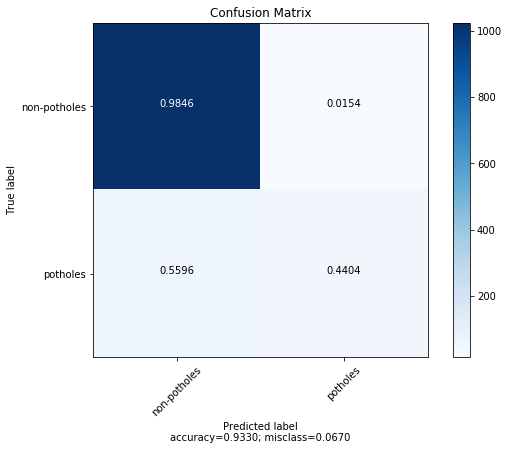

In [133]:
plot_confusion_matrix(cm           =cnf_mat, 
                      normalize    = True,
                      target_names = ['non-potholes', 'potholes'],
                      title        = "Confusion Matrix")

In [66]:
elements, counts =  np.unique(y_test, return_counts = True)

In [67]:
print(np.asarray((elements, counts)))

[[   0    1]
 [1041  108]]
